# Ecommerce Customers Linear Regression Project
To determine whether the company should invest on Mobile App or Website

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Fetching Data

In [3]:
df = pd.read_csv("Ecommerce Customers")

In [4]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

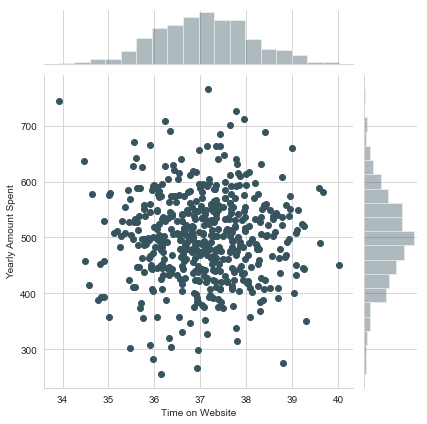

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

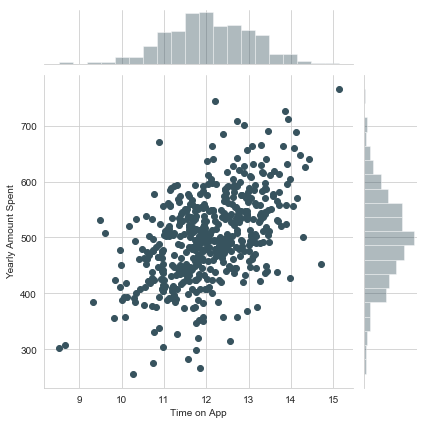

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

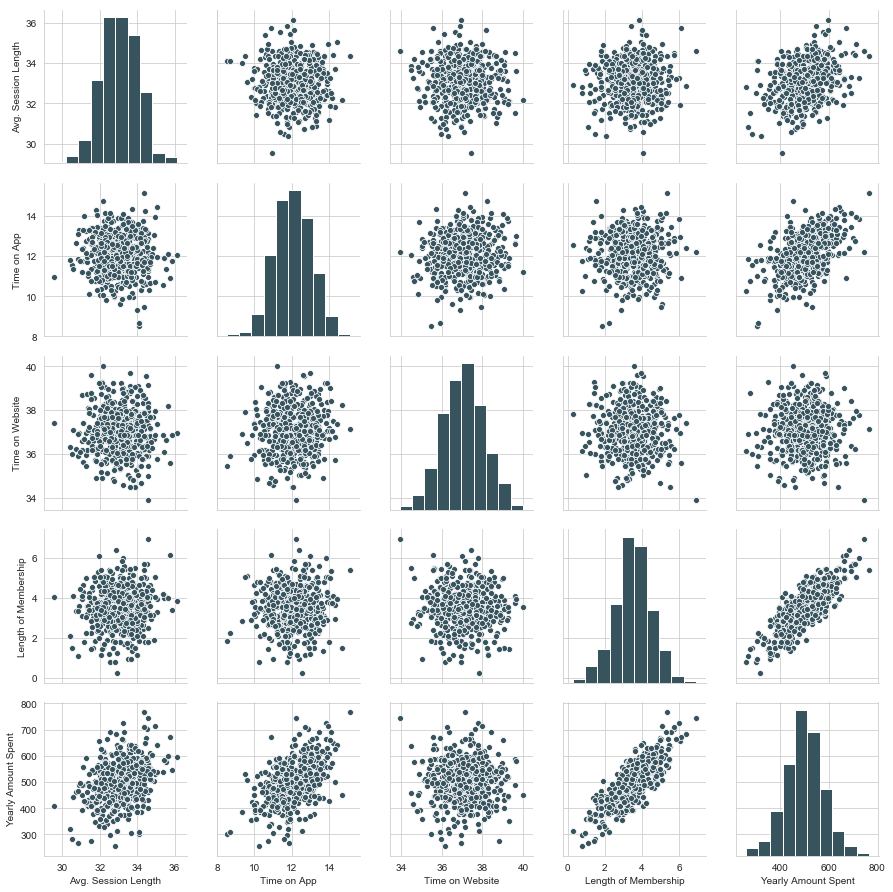

In [11]:
sns.pairplot(df)

Based On this Yearly Amount Spent is most correlated with length of Membership

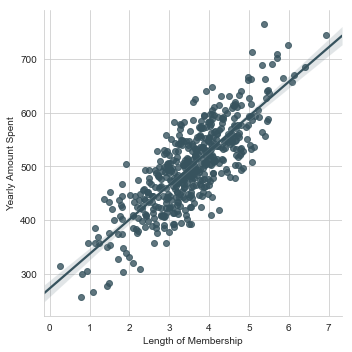

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Training And Testing Data

In [13]:
x = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [14]:
y = df['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Coefficients of Model

In [21]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [25.28771571 39.17178274  0.32166787 61.2484008 ]


## Predictions

In [22]:
pred = model.predict(x_test)

Text(0, 0.5, 'Predicted value')

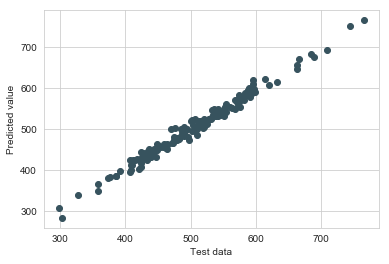

In [23]:
plt.scatter(y_test,pred)
plt.xlabel('Test data')
plt.ylabel('Predicted value')

## Evaluation of Model

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.41486008564528
MSE: 109.27910351983441
RMSE: 10.453664597634383


## Checking residuals

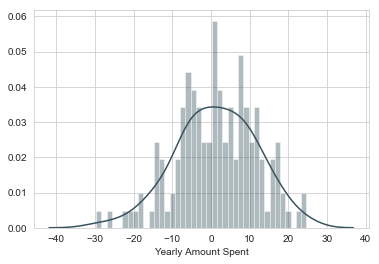

In [27]:
sns.distplot((y_test-pred),bins=40)

## Conclusion

In [28]:
coeffecients = pd.DataFrame(model.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.287716
Time on App,39.171783
Time on Website,0.321668
Length of Membership,61.248401


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!